# **PROJECT - (23rd April, 2021 - 09th May, 2021)**



## **1. PART ONE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
project_path = '/content/drive/MyDrive/My Files/AIML Workbooks'

In [ ]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
import tensorflow as tf     # Importing library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn import svm              # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing               # Importing preprocessing library 

from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model               # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten, ZeroPadding2D, UpSampling2D, Reshape, SpatialDropout2D, Concatenate, Embedding, LSTM      # Importing necessary libraries 
from tensorflow.keras.applications.mobilenet import preprocess_input           # Importing for model building
from tensorflow.python.keras.preprocessing.text import Tokenizer    # Importing necessary library
from tensorflow.python.keras.preprocessing.sequence import pad_sequences       # Importing necessary library 
from tensorflow.python.keras.models import load_model               # Importing necessary library
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau            # Importing for model building 
from tensorflow.keras.applications.mobilenet import MobileNet       # Importing for model building 
from tensorflow.keras.losses import binary_crossentropy             # Importing for model building
from tensorflow.keras.backend import log, epsilon          # Importing necessary library for model building 
from keras.utils import np_utils     # Importing necessary library
from sklearn import svm              # Importing necessary library for model building
from sklearn.svm import SVC          # Import svc library for model building

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array            # Loading image generator 
from keras.preprocessing import image           # Importing necessary image library
from tensorflow import keras         # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD          # Importing optimizer library
import cv2                  # Importing necessary library
from PIL import ImageFile            # Importing image library
from tqdm import tqdm                # Importing necessary library
import time                 # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid              # Importing necessary image library
from PIL import Image       # Importing image library

import re                   # Importing regular expression library 
import nltk                 # Import necessary library 
from nltk.corpus import stopwords               # Importing necessary library 
from sklearn.feature_extraction.text import CountVectorizer          # Importing count library 
from sklearn.preprocessing import MultiLabelBinarizer      # Imorting necessary library 
import json                 # Importing json to import file 
import urllib               # Importing necessary library
from tensorflow.keras.preprocessing.text import Tokenizer            # Importing tokenizer to tokenize words
from tensorflow.keras.preprocessing.sequence import pad_sequences              # Importing necessary library
from wordcloud import WordCloud      # Importing necessary library
nltk.download("stopwords")           # Loading necessary datasets from nltk
nltk.download("punkt")               # Loading necessary datasets from nltk
nltk.download('punkt')               # Loadiing necessary datasets from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Loading and checking the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Files/AIML Workbooks/IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.size

100000

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


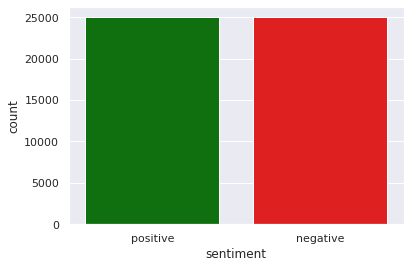

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [ ]:
# Visualizing the positive and negative sentiments

sns.countplot(df['sentiment'], palette = ['green','red'])
plt.show()
print(df.sentiment.value_counts())

We can observe from the above graphical representation that both positive and negative sentiments are equal.

In [ ]:
# Converting our sentiments into integer values

df.sentiment  = [ 1 if each == 'positive' else 0 for each in df.sentiment]

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


Checking to see if the sentiments have been coverted to integer values

## **Cleaning the dataset**

Process of clearing punctuation marks in data.

Cleaning unnecessary marks in data.

Capitalization to lowercase.

Cleaning extra spaces.

Removal of stopwords in sentences.

In [ ]:
wpt = nltk.WordPunctTokenizer()
stpwds = nltk.corpus.stopwords.words('english')     # Stop word list 

In [ ]:
df['review'] = df['review'].apply(lambda x: re.sub('[,\.!?:()"]', ' ', x))
df['review'] = df['review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df['review'] = df['review'].apply(lambda x: x.lower())
df['review'] = df['review'].apply(lambda x: x.strip())

def token(values):
  words = nltk.tokenize.word_tokenize(values)
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
  not_stwd_doc = " ". join(filtered_words)
  return not_stwd_doc
df['review'] = df['review'].apply(lambda x: token(x))

In [ ]:
sentiment = df['sentiment'].values
sentiment 

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
df = df['review']

## **Splittting data into train and test set**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, sentiment, test_size = 0.20, random_state = 42)

In [ ]:
# Creating a dictionary of 10000 most used words

tokenizer = Tokenizer (num_words = 10000)
tokenizer.fit_on_texts(df)

In [ ]:
# Bringing all comments to the same size inorder to process them in our model building

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Making a word count for each of the sentences in the data and creating a list 

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
# Here when setting the number of tokens, a number is determined by taking into account the variability around the average.

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

272

In [ ]:
# It is checked what percentage of the data this determined number covers.

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.945

In [ ]:
# Data is adjusted according to the number of tokens specified

x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [ ]:
x_train_pad.shape

(40000, 272)

As you can see we have set it to shape 272, so max_tokens,

In [ ]:
# Writing a function to revert the sentences we coverted to intergers back to sentences

idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
  words = [inverse_map[token] for token in tokens if token != 0]
  text = ' '.join(words)
  return text

In [ ]:
print(return_to_sentence(x_train_pad[9]))

behind rise evil seems br br hitler bad man bad man hated jews case miss going fact every scene film br br effort whatsoever try explain mood time hitler may adopted views needless say unlike generally excellent nazis warning history film neglected point fact nearly leaders communist rising jewish may views subject jews absolutely crucial aspect understanding much nazi era br br much understanding done film makers going go got stuff knew anyway certainly get fascinating fact hitler briefly communist immediately ww would course far complex film handle might even detract relentless bad away br br know bad man however also know figure public speaker private situations could polite even sympathetic course views like anti alcohol anti smoking many guardian readers could agree also fond animals hence wholly invented dog scene absurd br br also accounts seen brave soldier ww whilst saw iron cross never get see acts bravery script needless say also get insight whatsoever fired war experiences 

In [ ]:
print(x_train_pad[9])

[ 384 2010  337   85    1    1 2001   15   44   15   44 1633 4272  293
  556   70   91   73   47    3    1    1  635 1464  236 1102 1092    7
 2001   95 5126 2614 2959   49  879 1144  203 3346 1585  355    3 6840
  112   91  663 5932 4068 4094 2228   95 2614  650 4272  298 4069 1139
 1600   14 2350  842    1    1   14 1600  114    3 1072   70   52   83
  388  539  416  301   16 1281   91 2001 3023 4068 1068 4827    9  152
  117 1146    3 2642  123    8 6322 6438   15  132    1    1   41   15
   44   89   19   41  695  894 9715 1799  987   24 9240    8 2029  152
 2614    5  932 4506  932 2979   32 7328 5965   24  870   19 4059 1428
 2738 5196 5007  642   47 1708    1    1   19 5806   33 2609 1374 4827
 1656  105 3801 1459   36   16   12 1251 9414  119 2959   49   19   16
 2447 1464 3631  183 2272 1656 3434   32  278  144  425    5  112 2228
 4111 5481  136 1600  650   34  183   14   27  107    6  205  340 2368
 1908 3561  332 6116  926  160   48 2400  237 7961    1    1    3  301
  125 

## **Model Buidling**

In [ ]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim = 10000, output_dim = embedding_size, input_length = max_tokens, name= 'embedding_layer'))

model.add(LSTM(units = 16, return_sequences = True))
model.add(Dropout(0.1))

model.add(LSTM(units = 8, return_sequences= True))
model.add(Dropout(0.1))

model.add(LSTM(units = 4))
model.add(Dropout(0.1))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = Adam(lr = 1e-3)
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 272, 50)           500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 272, 16)           4288      
_________________________________________________________________
dropout_3 (Dropout)          (None, 272, 16)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 272, 8)            800       
_________________________________________________________________
dropout_4 (Dropout)          (None, 272, 8)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_5 (Dropout)          (None, 4)                

In [ ]:
history = model.fit(x_train_pad, y_train, validation_split = 0.3, batch_size = 1000, epochs = 10, shuffle  = True, verbose = 1)

Epoch 1/10
28/28 [==============================] - 7s 144ms/step - loss: 0.6898 - accuracy: 0.5889 - val_loss: 0.6447 - val_accuracy: 0.7455
Epoch 2/10
28/28 [==============================] - 3s 117ms/step - loss: 0.5824 - accuracy: 0.7956 - val_loss: 0.4837 - val_accuracy: 0.8464
Epoch 3/10
28/28 [==============================] - 3s 115ms/step - loss: 0.4445 - accuracy: 0.8813 - val_loss: 0.4265 - val_accuracy: 0.8644
Epoch 4/10
28/28 [==============================] - 3s 116ms/step - loss: 0.3774 - accuracy: 0.9118 - val_loss: 0.3983 - val_accuracy: 0.8658
Epoch 5/10
28/28 [==============================] - 3s 117ms/step - loss: 0.3299 - accuracy: 0.9257 - val_loss: 0.3824 - val_accuracy: 0.8667
Epoch 6/10
28/28 [==============================] - 3s 117ms/step - loss: 0.2925 - accuracy: 0.9333 - val_loss: 0.3765 - val_accuracy: 0.8653
Epoch 7/10
28/28 [==============================] - 3s 116ms/step - loss: 0.2732 - accuracy: 0.9346 - val_loss: 0.3686 - val_accuracy: 0.8669
Epoch 

In [ ]:
result = model.evaluate(x_test_pad, y_test)

313/313 [==============================] - 6s 15ms/step - loss: 0.3755 - accuracy: 0.8653


In [ ]:
x = model.predict(x_test_pad)

In [ ]:
print(x)

[[0.9118545 ]
 [0.9136807 ]
 [0.08736128]
 ...
 [0.9157319 ]
 [0.86391574]
 [0.8981884 ]]


In [ ]:
y = []
a = 0
for i in x:
  if i >= 0.5:
    a = 1
  else:
    a = 0
  y.append(a)

In [ ]:
print(y)

[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 

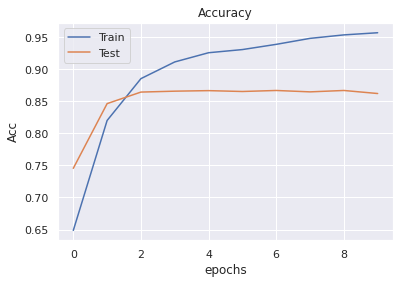

In [ ]:
# Visualizing accuracy through graphical representation 

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

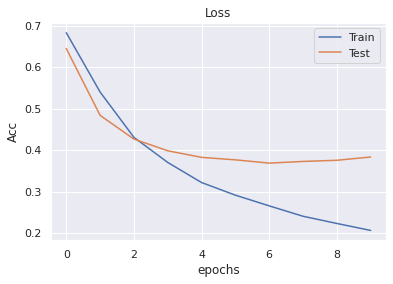

In [ ]:
# Visualizing loss through graphical representation

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
dataset_predict = df.copy()
dataset_predict = pd.DataFrame(dataset_predict)
dataset_predict.columns = ['review']
dataset_predict = dataset_predict.reset_index()
dataset_predict = dataset_predict.drop(['index'], axis=1)
dataset_predict.head()

,review
0,one reviewers mentioned watching oz episode ho...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter mattei love time money visually stunnin...


In [ ]:
test_actual_label = sentiment.copy()
test_actual_label = pd.DataFrame(test_actual_label)
test_actual_label.columns = ['sentiment']
test_actual_label['sentiment'] = test_actual_label['sentiment'].replace({1: 'positive', 0: 'negative'})
test_actual_label['sentiment'].head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [ ]:
test_predicted_label = y.copy()
test_predicted_label = pd.DataFrame(test_predicted_label)
test_predicted_label.columns = ['predicted_sentiment']
test_predicted_label['predicted_sentiment'] = test_predicted_label['predicted_sentiment'].replace({1: 'positive', 0: 'negative'})

In [ ]:
test_result = pd.concat([dataset_predict, test_actual_label, test_predicted_label], axis=1)
test_result.head()

,review,sentiment,predicted_sentiment
0,one reviewers mentioned watching oz episode ho...,positive,positive
1,wonderful little production br br filming tech...,positive,positive
2,thought wonderful way spend time hot summer we...,positive,negative
3,basically family little boy jake thinks zombie...,negative,positive
4,petter mattei love time money visually stunnin...,positive,negative


# **2. PART TWO**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
project_path = '/content/drive/MyDrive/My Files/AIML Workbooks'

In [ ]:
import os                   # Importing os library
import pandas as pd         # To read the data set
import numpy as np          # Importing numpy library
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt      # Necessary library for plotting graphs
from glob import glob       # Importing necessary library
import tensorflow as tf     # Importing library
%matplotlib inline
sns.set(color_codes = True)

from sklearn import metrics          # Importing metrics
from sklearn.model_selection import train_test_split       # Splitting data into train and test set
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import StandardScaler           # Importing to standardize the data
from sklearn.impute import SimpleImputer                   # Importing to fill in zero values in the data
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import PolynomialFeatures       # Importing polynomial features library
from sklearn.decomposition import PCA           # Importing to run pca analysis on data
from sklearn import svm              # Importing necessary library for model building
from sklearn.ensemble import RandomForestClassifier        # Importing necessary library for model building
from sklearn.neighbors import KNeighborsClassifier         # Importing necessary library for model building  
from sklearn import preprocessing               # Importing preprocessing library 

from sklearn.model_selection import KFold, cross_val_score           # Importing kfold for cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV           # Importing for hypertuning model
from sklearn.cluster import KMeans              # For KMeans cluster model building
from scipy.stats import zscore       # Import zscore library
from scipy.spatial.distance import cdist        # Importing cdist functionality for elbow graph
import tensorflow           # Importing tensorflow library
from tensorflow.keras.models import Sequential, Model               # Importing tensorflow library
from tensorflow.keras.utils import to_categorical          # Importing tensorflow library
from tensorflow.keras import optimizers                    # Importing optimizers
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, MaxPooling2D, Conv2D, Flatten, ZeroPadding2D, UpSampling2D, Reshape, SpatialDropout2D, Concatenate, Embedding, Bidirectional, GlobalAveragePooling1D, LSTM     # Importing necessary libraries 
from tensorflow.keras.applications.mobilenet import preprocess_input           # Importing for model building
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau            # Importing for model building 
from tensorflow.keras.applications.mobilenet import MobileNet       # Importing for model building 
from tensorflow.keras.losses import binary_crossentropy             # Importing for model building
from tensorflow.keras.backend import log, epsilon          # Importing necessary library for model building 
from keras.utils import np_utils     # Importing necessary library
from sklearn import svm              # Importing necessary library for model building
from sklearn.svm import SVC          # Import svc library for model building

from skimage.color import rgb2gray              # Loading color library
from sklearn.preprocessing import OneHotEncoder            # Library for one hot encoding
from sklearn.metrics import confusion_matrix               # Loading necessary library
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array            # Loading image generator 
from keras.preprocessing import image           # Importing necessary image library
from tensorflow import keras         # Loading keras libaray 
from tensorflow.keras.optimizers import Adam, SGD          # Importing optimizer library
import cv2                  # Importing necessary library
from PIL import ImageFile            # Importing image library
from tqdm import tqdm                # Importing necessary library
import time                 # Importing time library
from mpl_toolkits.axes_grid1 import ImageGrid              # Importing necessary image library
from PIL import Image       # Importing image library

import re                   # Importing regular expression library 
import nltk                 # Import necessary library 
from nltk.corpus import stopwords               # Importing necessary library 
from sklearn.feature_extraction.text import CountVectorizer          # Importing count library 
from sklearn.preprocessing import MultiLabelBinarizer      # Imorting necessary library 
import json                 # Importing json to import file 
import urllib               # Importing necessary library
from tensorflow.keras.preprocessing.text import Tokenizer            # Importing tokenizer to tokenize words
from tensorflow.keras.preprocessing.sequence import pad_sequences              # Importing necessary library
from wordcloud import WordCloud      # Importing necessary library

In [ ]:
def parse_data(file):
  for I in open(file, 'r'):
    yield json.loads(I)

df = list(parse_data('/content/drive/MyDrive/My Files/AIML Workbooks/Sarcasm_Headlines_Dataset.json'))

In [ ]:
len(df)

26709

In [ ]:
# The dataset is a list of dictionaries as seen below

df[0:10]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
# Seperating data into features and labels for futher processing

headline_tmp = []
labels = []

for items in df:
  headline_tmp.append(items['headline'])
  labels.append(items['is_sarcastic'])

In [ ]:
headline_tmp[0:10]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages"]

In [ ]:
labels[0:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [ ]:
# Steps to remove stopwords and punctuations
nltk.download('stopwords')
stop = list(stopwords.words('english'))

# Remove stopwords from the headlines
headline = []
for sent in headline_tmp:
   filtered_list = []
   for word in sent.split():
     if not word in stop:
       filtered_list.append(word)
   join_str = ' '.join([str(ele) for ele in filtered_list])
   headline.append(join_str)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
headline[0:10]

["former versace store clerk sues secret 'black code' minority shoppers",
 "'roseanne' revival catches thorny political mood, better worse",
 "mom starting fear son's web series closest thing grandchild",
 'boehner wants wife listen, come alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday magical way',
 "advancing world's women",
 'fascinating case eating lab-grown meat',
 'ceo send kids school, work company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser ages"]

## **Word Cloud**

In [ ]:
# Creating a dataframe from the oirginal json file

sarcastic = pd.read_json('/content/drive/MyDrive/My Files/AIML Workbooks/Sarcasm_Headlines_Dataset.json', lines = True)

In [ ]:
sarcastic.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
sarcastic.tail()

,article_link,headline,is_sarcastic
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0
26708,https://www.huffingtonpost.com/entry/gourmet-g...,gourmet gifts for the foodie 2014,0


In [ ]:
# Remvoing the article column from the dataframe we do not require it for out analysis

sarcastic.drop('article_link', axis =1, inplace = True )

In [ ]:
sarcastic.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
# Filtering rows to display is_sarcastic = 1

sarcastic[sarcastic.is_sarcastic == 1]

,headline,is_sarcastic
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
8,top snake handler leaves sinking huckabee camp...,1
15,nuclear bomb detonates during rehearsal for 's...,1
16,cosby lawyer asks why accusers didn't come for...,1
...,...,...
26693,new bailiff tired of hearing how old bailiff d...,1
26694,breaking: 'the onion' in kill range of boston ...,1
26695,seaworld crowd applauds for dolphin playfully ...,1
26702,pentagon to withhold budget figures out of res...,1


In [ ]:
# Filtering rows to display is_sarcastic = 0

sarcastic[sarcastic.is_sarcastic == 0]

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


Word cloud for 1000 most frequent words in sarcastic headline


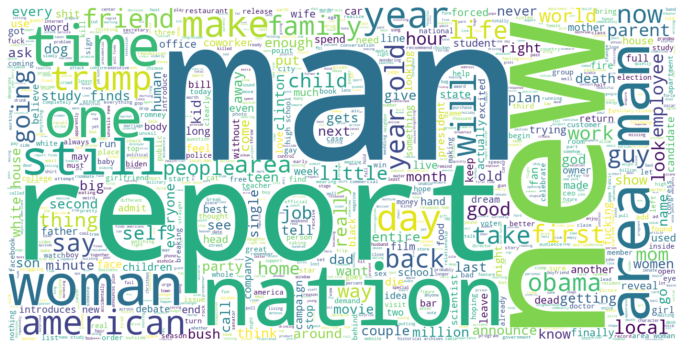

In [ ]:
# Defining a word cloud for 1000 most frequent words in sarcastic headlines 

wc = WordCloud(background_color='white', max_words = 1000, width= 1400, height = 700)
wc.generate(' '.join(sarcastic[sarcastic.is_sarcastic == 1]['headline']))

print('Word cloud for 1000 most frequent words in sarcastic headline')
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

Words cloud for 1000 most frequent words in non sarcastic headlines


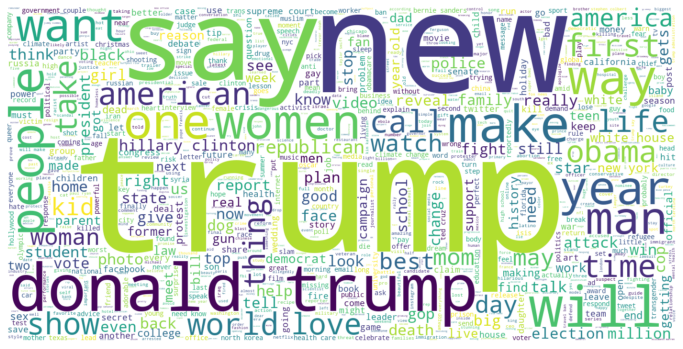

In [ ]:
# Defining a word cloud for 1000 most frequent words in non saracatic headlines

wc = WordCloud(background_color = 'white', max_words = 1000, width = 1400, height = 700)
wc.generate(' '.join(sarcastic[sarcastic.is_sarcastic == 0]['headline']))

print('Words cloud for 1000 most frequent words in non sarcastic headlines')

plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## **Distribution of Labels**

In [ ]:
sarcastic['is_sarcastic'].value_counts()


0    14985
1    11724
Name: is_sarcastic, dtype: int64

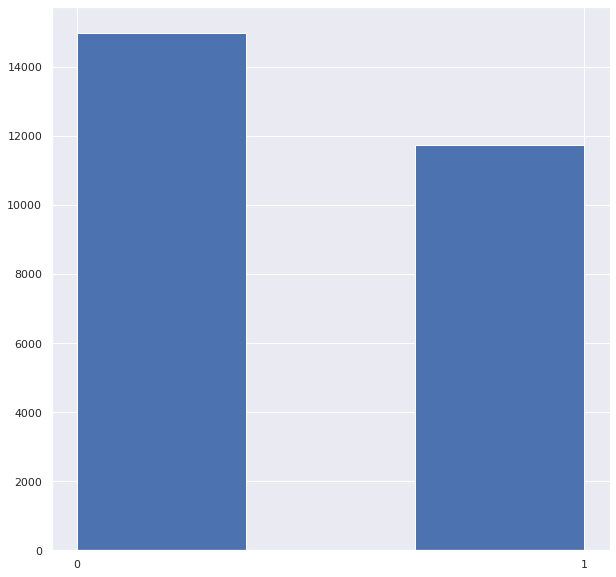

In [ ]:
# Visualizing the count via histogram plot

plt.figure(figsize = (10,10))
plt.hist(sarcastic['is_sarcastic'], bins = 3)
plt.xticks([0,1])
plt.show()

## **Distribution of length of headlines**

In [ ]:
# Creating a new column in the dataframe with the number of words for each headline

sarcastic['headline_length'] = sarcastic['headline'].apply(lambda x: len(x.split()))

In [ ]:
sarcastic['headline_length'].head()

0    12
1    14
2    14
3    13
4    11
Name: headline_length, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


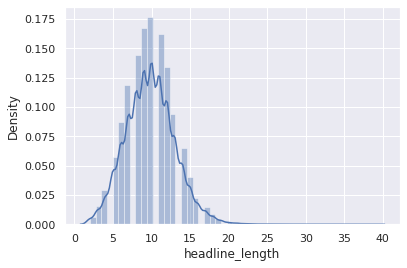

In [ ]:
# Visualizing density plot of headline lengths

sns.distplot(sarcastic['headline_length']);

In [ ]:
sarcastic['headline_length'].describe()

count    26709.000000
mean         9.845820
std          3.168955
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         39.000000
Name: headline_length, dtype: float64

In [ ]:
# Getting the 99.99th percentile using quantile method

sarcastic['headline_length'].quantile(0.9999)

30.32919999999649

## **Data Processing**

In [ ]:
# Define parameters

#embedding_dim = the dimnesion to which each of the words in the sentence will be encoded to as part of the training
#max_length = Maximum length to be retained of each sentence(headline) for the training
#trunc_type = trucate(suffix) the sentence from the back if the sentence length exceeds max_length(32)
#padding_type = pad(suffix) the sentence with 0's at the back if the sentence length is less than max_length(32)
#oov_token = Out Of Vocubulary token to be used if the word is not part of the vocabulary

embedding_dim = 100
max_length = 32
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
# Split data into training and validation datasets using the training_size parameter defined above

train_sentences = headline[:training_size]
train_labels = labels[:training_size]

validation_sentences = headline[training_size:]
validation_labels = labels[training_size:]

print(training_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

20000
20000
20000
6709
6709


In [ ]:
# Use tokenizer from Keras to tokenize and transform the words into numerical data 
# Use pad_sequences from keras to pad the data to make it of same length(max_length)

tokenizer = Tokenizer(oov_token= oov_tok)
tokenizer.fit_on_texts(headline)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen = max_length, padding = padding_type, truncating=trunc_type)

In [ ]:
# Vocabulary size will be the total number of the words in the word_index identified by the tokenizer from the training data

len(word_index)

29590

In [ ]:
training_sequences[0]

[216, 15046, 572, 3237, 2192, 287, 2472, 15047, 2473, 8352]

In [ ]:
training_padded[0]

array([  216, 15046,   572,  3237,  2192,   287,  2472, 15047,  2473,
        8352,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [ ]:
# Convert into numpy array

training_padded = np.array(training_padded)
validation_padded = np.array(validation_padded)
training_labels_pad = np.array(train_labels)
validation_labels_pad = np.array(validation_labels)

## **Model 1. Using default embedding layer of of keras**

In [ ]:
# Define model

vocab_size = len(word_index)

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Defining early stopping if validation accuracy does not change within 5 epochs

callback = EarlyStopping(patience = 5, verbose = 1, monitor = 'val_accuracy', restore_best_weights= True)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           2959100   
_________________________________________________________________
dropout (Dropout)            (None, 32, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 128)           84480     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 64)            41216     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
history = model.fit(training_padded, training_labels_pad, validation_data=(validation_padded,validation_labels_pad), batch_size = 128, epochs = 30)

Epoch 1/30
157/157 [==============================] - 5s 33ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 1.5479 - val_accuracy: 0.7711
Epoch 2/30
157/157 [==============================] - 4s 26ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 1.4859 - val_accuracy: 0.7734
Epoch 3/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 1.9677 - val_accuracy: 0.7696
Epoch 4/30
157/157 [==============================] - 4s 26ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.7870 - val_accuracy: 0.7733
Epoch 5/30
157/157 [==============================] - 4s 26ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 1.7145 - val_accuracy: 0.7731
Epoch 6/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 1.6226 - val_accuracy: 0.7725
Epoch 7/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 1.9769 - val_accuracy: 0.7734

## **Model 2. Using Glove Embeddings**

In [ ]:
vocab_size = len(word_index) #30813

# for each line in the glove embedding text file, the first value is the word and the second value is the embedding (100 dimension array)
# Store the values into a dictionary
embeddings_index = {}
with open('/content/drive/MyDrive/My Files/AIML Workbooks/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word]=coefs

# initialize a matrix of zeros and then assign the encoding for the words in the vocabulary to the appropriate index in the embedding_matrix
embeddings_matrix = np.zeros((vocab_size+1, embedding_dim))
for key in sorted(word_index, key=word_index.get)[:vocab_size]:
    embedding_vector = embeddings_index.get(key)
    if embedding_vector is not None:
        embeddings_matrix[word_index[key]] = embedding_vector

In [ ]:
embeddings_matrix.shape

(29591, 100)

In [ ]:
# First 10 words and the corresponding index from the word_index dictionary which holds the vocabulary

for key in sorted(word_index, key=word_index.get)[:10]:
  print(key,end=' ')
  print(word_index.get(key))

<OOV> 1
new 2
trump 3
man 4
one 5
report 6
year 7
area 8
donald 9
u 10


In [ ]:
# Embeddings for the first 10 words

for key in sorted(word_index, key=word_index.get)[:10]:
  print(key,end=' ')
  print(embeddings_index.get(key))

<OOV> None
new [-4.3959e-02  1.8936e-01  6.6110e-01 -4.9007e-01  3.2211e-01 -3.4161e-01
 -6.8480e-02  3.1364e-01 -7.1142e-01  5.7436e-01 -3.3588e-01 -5.2279e-01
 -3.9075e-01 -8.9694e-02  4.6371e-01 -3.5610e-01  8.4576e-01 -2.6188e-02
 -1.9328e-01 -8.3846e-02  3.1806e-01 -1.9812e-01  3.0009e-01  6.9189e-02
  5.4470e-01 -5.9193e-01  5.4221e-01 -6.2876e-01 -5.3447e-01  4.2334e-01
  3.0869e-02  9.7164e-01 -5.6222e-01  4.5752e-02 -5.7100e-01  8.0185e-02
 -8.1434e-02 -6.0260e-01  1.6466e-01 -4.0281e-01 -4.7701e-01 -5.1950e-01
  1.2777e-01 -4.3775e-01  2.6602e-01  4.8752e-01 -6.0220e-02 -5.2622e-01
  3.7687e-01 -1.8007e-01  3.0166e-02 -9.4577e-02  1.6330e-01  5.9041e-01
 -4.8877e-01 -3.4230e+00  1.3113e-01 -8.0386e-02  1.8978e+00  1.8857e-01
 -5.7300e-01  8.6358e-01  2.1116e-03  3.6060e-01  8.0475e-01 -1.3954e-01
 -5.3935e-02  3.8873e-01  3.0673e-01 -3.1395e-01  8.3238e-02 -4.1737e-01
 -1.0998e+00 -8.8005e-01  2.1550e-01 -2.6132e-01 -1.0091e-01  7.9584e-02
 -1.2341e+00 -6.5281e-01  6.3363e-01

In [ ]:
embeddings_matrix[word_index['new']]

array([-4.39589992e-02,  1.89359993e-01,  6.61099970e-01, -4.90069985e-01,
        3.22109997e-01, -3.41610014e-01, -6.84799999e-02,  3.13639998e-01,
       -7.11420000e-01,  5.74360013e-01, -3.35880011e-01, -5.22790015e-01,
       -3.90749991e-01, -8.96940008e-02,  4.63710010e-01, -3.56099993e-01,
        8.45759988e-01, -2.61879992e-02, -1.93279997e-01, -8.38460028e-02,
        3.18060011e-01, -1.98119998e-01,  3.00089985e-01,  6.91889971e-02,
        5.44700027e-01, -5.91929972e-01,  5.42209983e-01, -6.28759980e-01,
       -5.34470022e-01,  4.23339993e-01,  3.08689997e-02,  9.71639991e-01,
       -5.62219977e-01,  4.57520001e-02, -5.70999980e-01,  8.01850036e-02,
       -8.14339966e-02, -6.02599978e-01,  1.64660007e-01, -4.02810007e-01,
       -4.77010012e-01, -5.19500017e-01,  1.27770007e-01, -4.37750012e-01,
        2.66020000e-01,  4.87520009e-01, -6.02199994e-02, -5.26220024e-01,
        3.76870006e-01, -1.80069998e-01,  3.01660001e-02, -9.45769995e-02,
        1.63299993e-01,  

In [ ]:
# Define model

vocab_size = len(word_index)

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Defining early stopping if validation accuracy does not change within 5 epochs

callback = EarlyStopping(patience = 5, verbose = 1, monitor = 'val_accuracy', restore_best_weights= True)

model_ge = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
optimizer_ge = tf.keras.optimizers.Adam()
model_ge.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer_ge)

In [ ]:
model_ge.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           2959100   
_________________________________________________________________
dropout (Dropout)            (None, 32, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 128)           84480     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 64)            41216     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
history_ge = model_ge.fit(training_padded, training_labels_pad, batch_size = 128, epochs = 30, validation_data=(validation_padded,validation_labels_pad), callbacks = [callback])

Epoch 1/30
157/157 [==============================] - 10s 37ms/step - loss: 0.6307 - accuracy: 0.6165 - val_loss: 0.4724 - val_accuracy: 0.7533
Epoch 2/30
157/157 [==============================] - 4s 25ms/step - loss: 0.2713 - accuracy: 0.8900 - val_loss: 0.4717 - val_accuracy: 0.7970
Epoch 3/30
157/157 [==============================] - 4s 26ms/step - loss: 0.1321 - accuracy: 0.9530 - val_loss: 0.5499 - val_accuracy: 0.7943
Epoch 4/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0779 - accuracy: 0.9753 - val_loss: 0.6302 - val_accuracy: 0.7867
Epoch 5/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.8207 - val_accuracy: 0.7830
Epoch 6/30
157/157 [==============================] - 4s 25ms/step - loss: 0.0356 - accuracy: 0.9901 - val_loss: 0.8677 - val_accuracy: 0.7794
Epoch 7/30
157/157 [==============================] - 4s 26ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.9257 - val_accuracy: 0.778

In [ ]:
# Saving the model

model.save("sarcasm_glove_mymodel.h5")

In [ ]:
# Retrieve and evaluate the model with the validation set 

model = keras.models.load_model('sarcasm_glove_mymodel.h5')

In [ ]:
model.evaluate(validation_padded,validation_labels_pad)

210/210 [==============================] - 2s 4ms/step - loss: 2.6553 - accuracy: 0.7708


[2.6552867889404297, 0.7707557082176208]

In [ ]:
# Prediction using the same validation dataset to plot confusion matrix

pred = (model.predict(validation_padded) > 0.5).astype("int32")

In [ ]:
# Confusion Matrix

from sklearn import metrics

cm = metrics.confusion_matrix(validation_labels_pad,pred)
print(cm)

[[3155  624]
 [ 914 2016]]


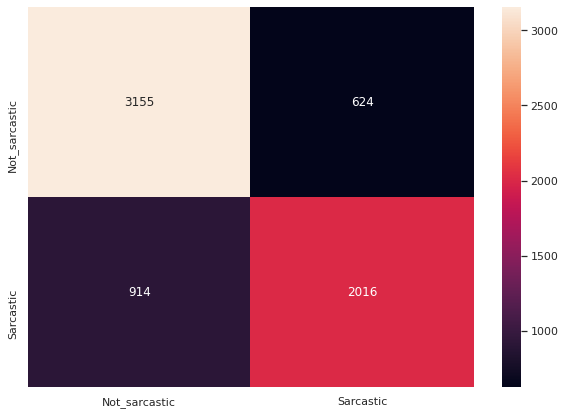

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in ['Not_sarcastic','Sarcastic']],
                                  columns = [i for i in ['Not_sarcastic','Sarcastic']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt = '1g')